In [6]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [7]:
keras.backend.backend()

'tensorflow'

In [8]:
fm = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

4423680/4422102 [==============================] - 15s 3us/step


In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [12]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [17]:
y_train[4]

0

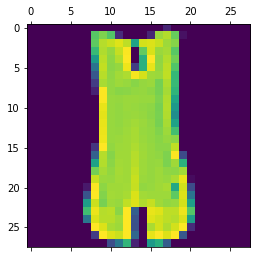

In [16]:
plt.matshow(X_train[4])

In [18]:
X_train = X_train/255
X_test = X_test/255

In [33]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [36]:
model.fit(X_train, y_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - ETA: 0s - loss: 0.4867 - accuracy: 0.82 - 9s 149us/step - loss: 0.4867 - accuracy: 0.8279
Epoch 2/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.3651 - accuracy: 0.8684
Epoch 3/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.3254 - accuracy: 0.8821
Epoch 4/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.3058 - accuracy: 0.8861
Epoch 5/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.2869 - accuracy: 0.8939


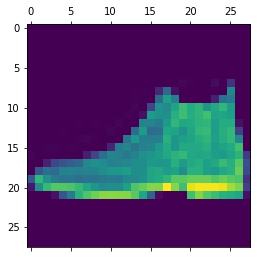

In [24]:
plt.matshow(X_test[0])

In [25]:
yp = model.predict(X_test)

In [26]:
yp[0]

array([1.01389242e-05, 6.37977990e-08, 9.06267132e-08, 2.32877554e-07,
       4.19309544e-07, 1.44136709e-03, 1.36751205e-05, 3.32996473e-02,
       8.76206905e-05, 9.65146780e-01], dtype=float32)

In [27]:
np.argmax(yp[0])

9

In [28]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [31]:
class_labels[np.argmax(yp[0])]

'Ankle boot'

In [32]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 48us/step


[0.3471707080125809, 0.8755999803543091]